# Airbnb Data Cleaning Notebook 

In [6]:
import boto3
import sagemaker
import csv
import pandas as pd

sagemaker_session = sagemaker.Session()
role = sagemaker.get_execution_role()
bucket = sagemaker_session.default_bucket()
region = boto3.Session().region_name

sm = boto3.Session().client(service_name="sagemaker", region_name=region)

## Load Data

In [7]:
base_path = "./data/airbnb/"
calendar_path = base_path + "calendar/calendar.csv.gz"
reviews_path = base_path + "reviews/reviews.csv"

calendar_df = pd.read_csv(calendar_path)
reviews_df = pd.read_csv(reviews_path)

## Transformations on Listings and Reviews

In [20]:
# Transforming date to datetime dtype in month-year format
calendar_df['Date'] = pd.to_datetime(calendar_df['date'])
calendar_df['month_year'] = calendar_df['Date'].dt.strftime('%Y-%m')

In [21]:
# Transforming date to datetime dtype in month-year format
reviews_df['Date'] = pd.to_datetime(reviews_df['date'])
reviews_df['month_year'] = reviews_df['Date'].dt.strftime('%Y-%m')

In [26]:
# Getting count for listings/stays via grouping by month and year
calendar_grouped = calendar_df.groupby('month_year').size()

review_grouped = reviews_df.groupby('month_year').size()

# Converting series groupby output to a dataframe and renaming count field
calendar_grouped = calendar_grouped.reset_index()
calendar_grouped = calendar_grouped.rename(columns = {0:'num_listings'})

review_grouped = review_grouped.reset_index()
review_grouped = review_grouped.rename(columns = {0:'num_stays'})


In [32]:
calendar_grouped2 = calendar_df.groupby('Date').size()
calendar_grouped2 = calendar_grouped2.reset_index()
calendar_grouped2 = calendar_grouped2.rename(columns = {0:'num_listings'})

calendar_grouped2

,Date,num_listings
0,2022-12-20,6216
1,2022-12-21,6216
2,2022-12-22,6216
3,2022-12-23,6216
4,2022-12-24,6216
...,...,...
360,2023-12-15,6216
361,2023-12-16,6216
362,2023-12-17,6216
363,2023-12-18,6216


In [33]:
review_grouped2 = reviews_df.groupby('Date').size()
review_grouped2 = review_grouped2.reset_index()
review_grouped2 = review_grouped2.rename(columns = {0:'num_stays'})

review_grouped2

,Date,num_stays
0,2009-05-10,1
1,2009-05-28,1
2,2009-06-04,1
3,2009-06-30,1
4,2009-08-08,1
...,...,...
4225,2022-12-15,79
4226,2022-12-16,70
4227,2022-12-17,59
4228,2022-12-18,83


## Visualizing graphs for Airbnb listings and stays 

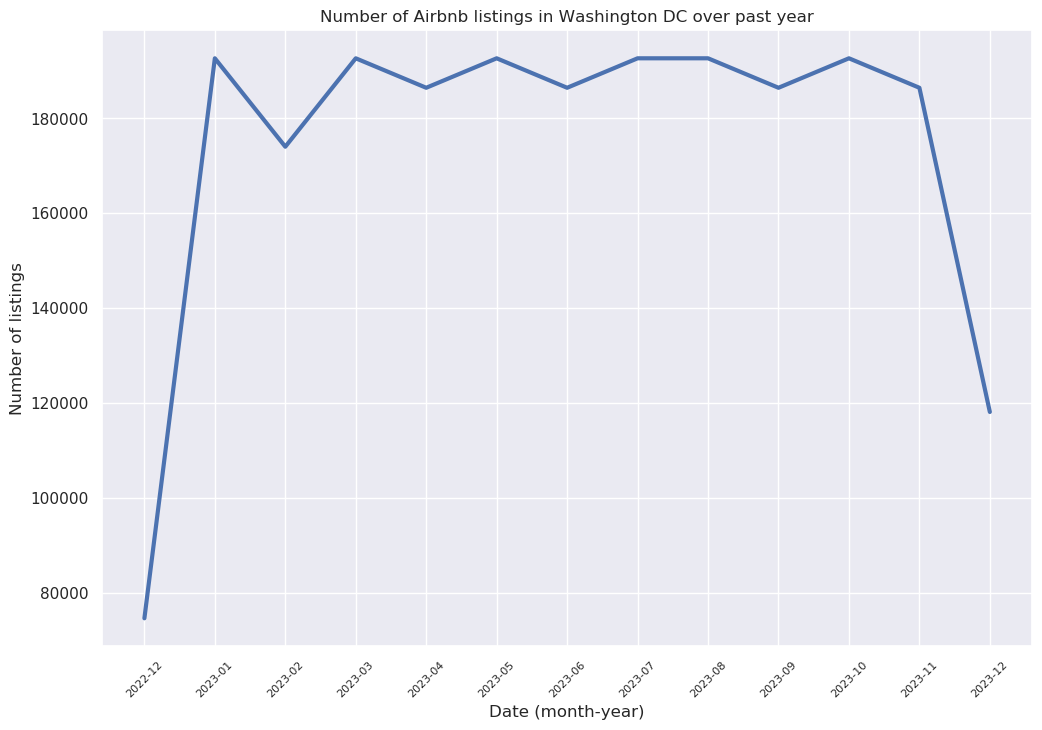

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(12,8)})

ax = sns.lineplot(data=calendar_grouped, x ='month_year', y = 'num_listings', palette='viridis', lw=3)
plt.xticks(rotation=45,fontsize=8)
ax.set(xlabel='Date (month-year)', ylabel='Number of listings')
plt.title("Number of Airbnb listings in Washington DC over past year")
plt.show()

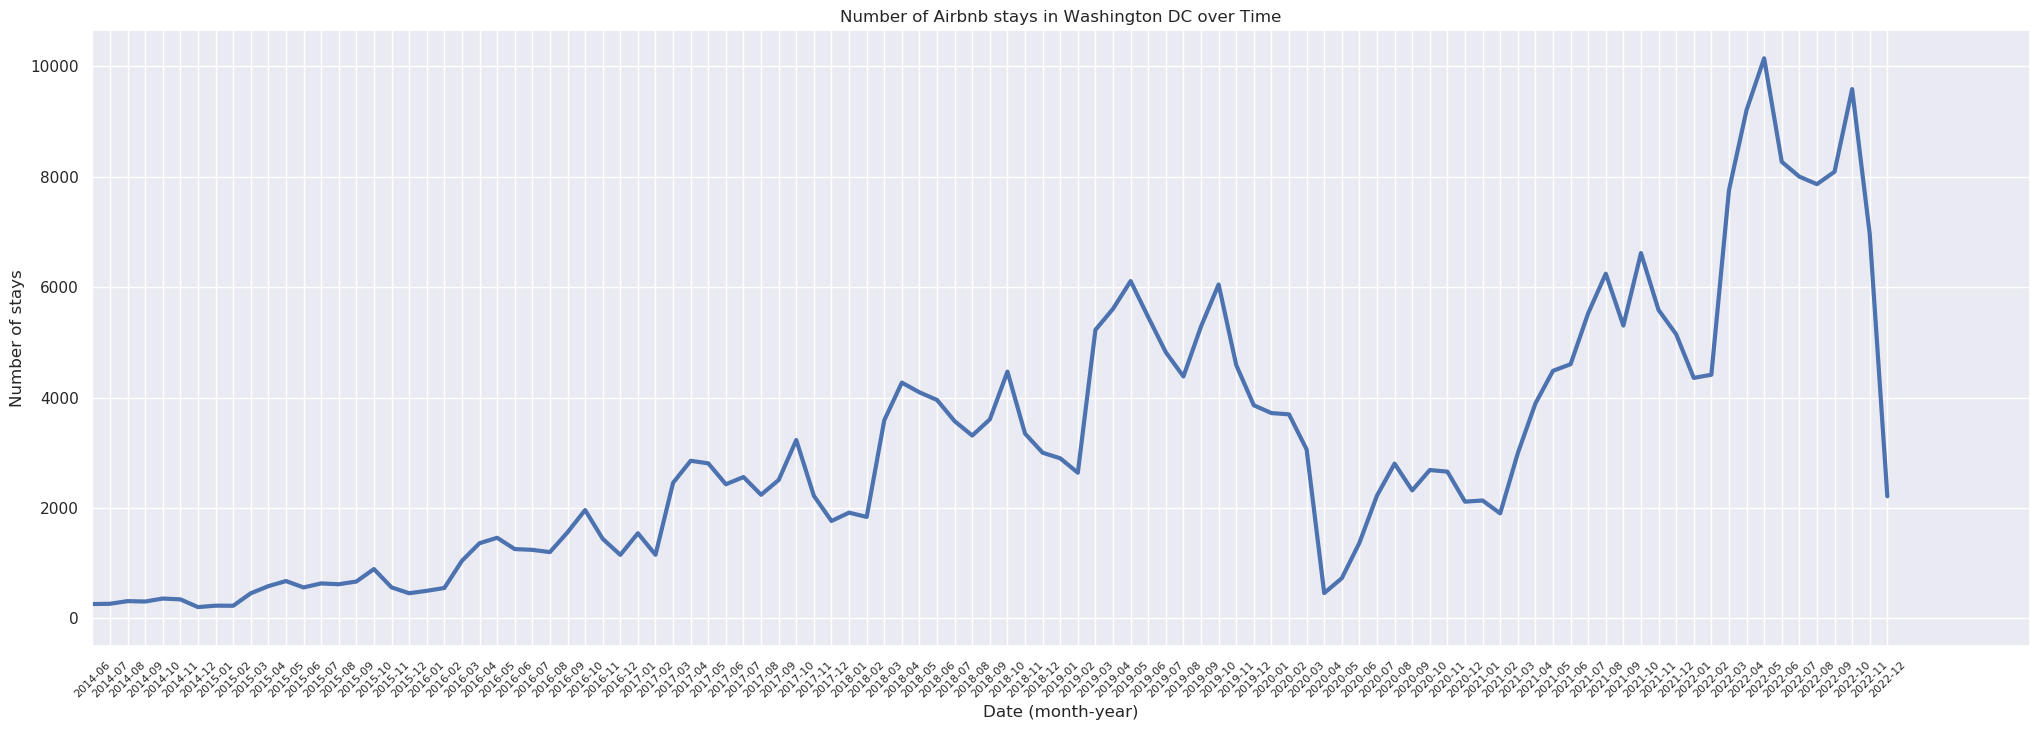

In [25]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(25,8)})

ax = sns.lineplot(data=review_grouped, x ='month_year', y = 'num_stays', palette='viridis', lw=3)
plt.xlim(xmin=60)
plt.xticks(rotation=45,fontsize=8)
ax.set(xlabel='Date (month-year)', ylabel='Number of stays')
plt.title("Number of Airbnb stays in Washington DC over Time")
plt.show()

## Storing Transformed Dataframes 

In [34]:
listings_clean = calendar_grouped
reviews_clean = review_grouped

listings_date = calendar_grouped2
reviews_date = review_grouped2

%store listings_clean
%store reviews_clean

%store listings_date
%store reviews_date

Stored 'listings_clean' (DataFrame)
Stored 'reviews_clean' (DataFrame)
Stored 'listings_date' (DataFrame)
Stored 'reviews_date' (DataFrame)


## Release Resources

In [14]:
%%html

<p><b>Shutting down your kernel for this notebook to release resources.</b></p>
<button class="sm-command-button" data-commandlinker-command="kernelmenu:shutdown" style="display:none;">Shutdown Kernel</button>
        
<script>
try {
    els = document.getElementsByClassName("sm-command-button");
    els[0].click();
}
catch(err) {
    // NoOp
}    
</script>

In [15]:
%%javascript

try {
    Jupyter.notebook.save_checkpoint();
    Jupyter.notebook.session.delete();
}
catch(err) {
    // NoOp
}